# <center> Практические задания по цифровой обработке сигналов </center>
# <center> Первая лабораторная работа </center>


В данной работе Вы познакомитесь с основными методами работы с аудиоданными в Python. Разбересь в том, как работает свертка, и примените пару интересных фильтров.

# Задание 1. Работа с аудиофайлами в Python (1 балл)

## Теория

Звук - это аналоговый сигнал. То есть он является непрерывным по времени и по значениям. Для того, чтобы работать со звуком на цифровом устройстве, надо преобразовать его в цифровое представление. Для этого надо разделить непрерывный сигнал на промежутки времени (дискретизация сигнала) и разбить непрерывные значения на интервалы (квантование сигнала). Выбраные параметры дискретизации и квантования сигнала напрямую влияют на качество цифрового сигнала. 

<!-- 
## Практика

1. Что хранится в .wav файле? Как узнать параметры дискретизации и квантования .wav файла? 

2. Запишите аудиофайл со своим голосом. Загрузите его. Попробуйте поменять ему частоту дискретизации. Нарисуйте форму волны считанного файла. Воспроизведите полученные сигналы. При какой частоте дискретизации становится невозможно разобрать человеческую речь?   

3. Чем .wav отличается от других кодеков, например .mp3 или .ogg? -->


<!-- ### Подсказка

Записать цифровой сигнал можно при помощи, например, [Audacity](https://www.audacityteam.org) или [Adobe Audition](https://www.adobe.com/ru/products/audition.html). Для считывания файлов воспользуйтесь библиотекой [scipy](https://www.scipy.org) или [librosa](https://librosa.org/doc/latest/index.html). Для воспроизведения аудиофайла удобно использовать класс Audio из модуля IPython.display, а для отрисовки - matplotlib. -->

In [1]:
import matplotlib.pyplot as plt 
import numpy as np
import scipy
%matplotlib inline

In [2]:
'''=====CONSTANTS====='''
FIG_SIZE=(20,10)

### 1. Что хранится в .wav файле? Как узнать параметры дискретизации и квантования .wav файла?

In [3]:
# YOUR ANSWER HERE

.waw - формат хранения несжатого оцифрованного аудиопотока. Файл в таком формате, состоит, по сути из заголовка и тела. В заголовке можно найти информацию о размере файла, частоте дискретизации, количестве каналов, битрейте. В области данных содержатся значения амплитуды звуковой волны в определённые моменты времени. Для того, что узнать параметры дискретизации и квантования необходимо прочитать заголовок файла.

### 2. Запишите аудиофайл со своим голосом. Загрузите его. Попробуйте поменять ему частоту дискретизации. Нарисуйте форму волны считанного файла. Воспроизведите полученные сигналы. При какой частоте дискретизации становится невозможно разобрать человеческую речь?

**Подсказка**

Записать цифровой сигнал можно при помощи, например, [Audacity](https://www.audacityteam.org) или [Adobe Audition](https://www.adobe.com/ru/products/audition.html). Для считывания файлов воспользуйтесь библиотекой [scipy](https://www.scipy.org) или [librosa](https://librosa.org/doc/latest/index.html). Для воспроизведения аудиофайла удобно использовать класс Audio из модуля IPython.display, а для отрисовки - matplotlib.

In [4]:
from scipy.io import wavfile
from scipy import signal

In [5]:
def plot_wave(data, color, fig_size, header):
    plt.figure(figsize=fig_size)
    plt.title(header)
    plt.plot(data, color=color)
    #plt.show()

def resample_wave(data, new_sample_rate):
    resampled_data = signal.resample(data, new_sample_rate)
    print(f'Новая частота: {new_sample_rate}, число сэмплов: {len(resampled_data)}')
    return resampled_data

<ipython-input-6-5b2b73fcbbd6>:4: WavFileWarning: Chunk (non-data) not understood, skipping it.
  samplerate, data = wavfile.read('lab_1_signal.wav')


Частота: 44100, число сэмплов: 240667 


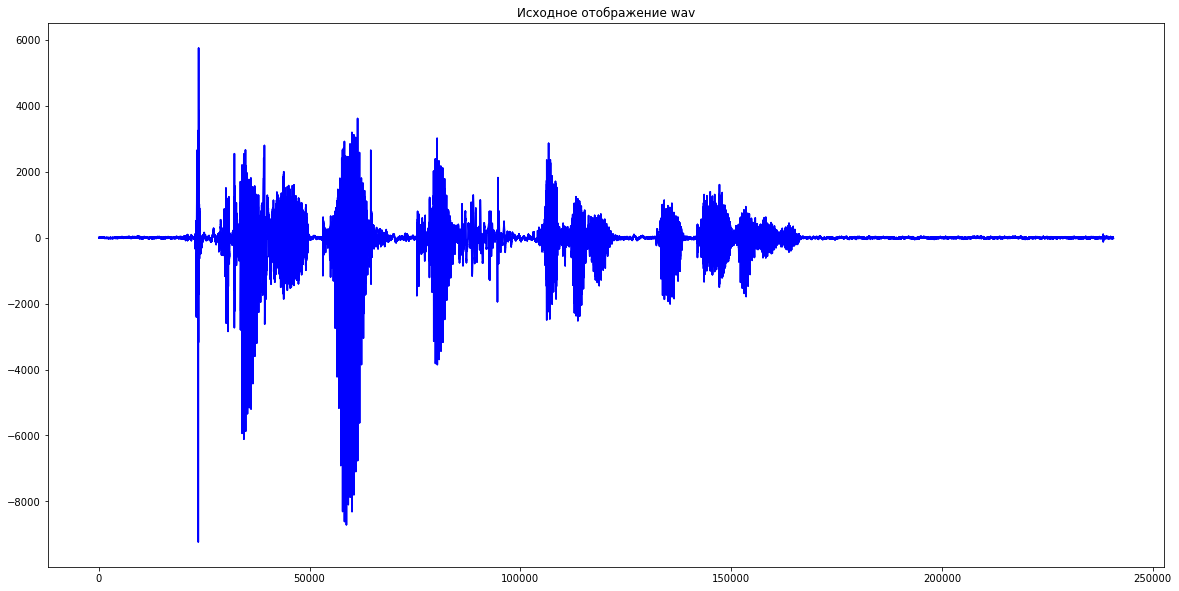

In [6]:
# YOUR ANSWER HERE

# исходный сигнал
samplerate, data = wavfile.read('lab_1_signal.wav')
print(f'Частота: {samplerate}, число сэмплов: {len(data)} ')
plot_wave(data,'blue', FIG_SIZE, "Исходное отображение wav")

Новая частота: 8000, число сэмплов: 8000


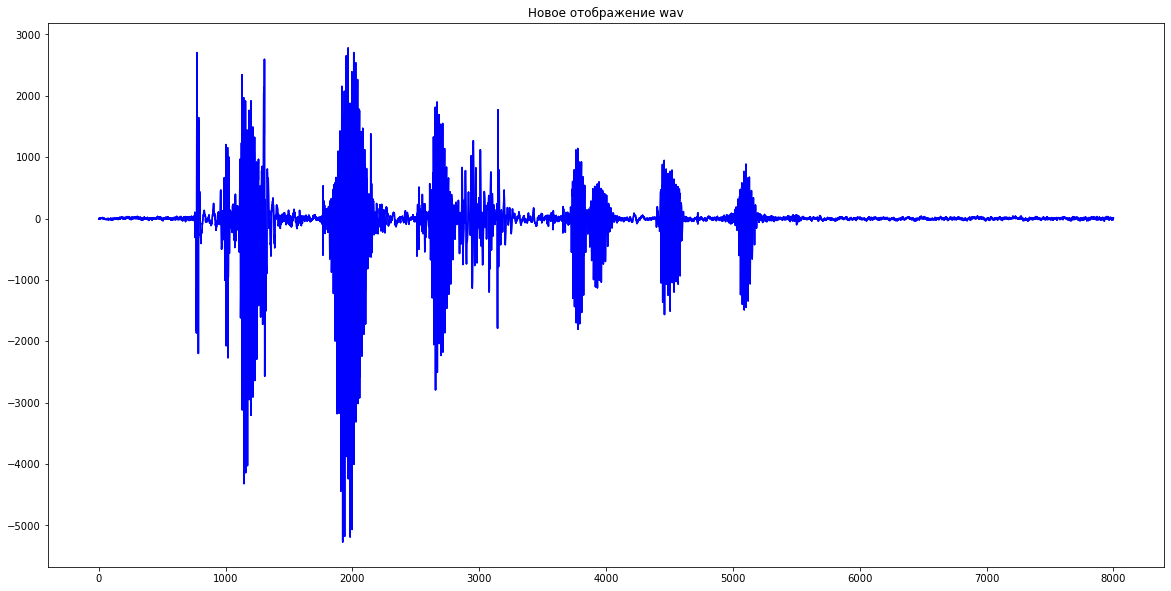

In [7]:
resampled_data = resample_wave(data, 8000)
plot_wave(resampled_data,'blue', FIG_SIZE, "Новое отображение wav")

Человеческую речь нельзя разобрать при частоте где-то 700-800 Гц.

### 3. Чем .wav отличается от других кодеков, например .mp3 или .ogg?

In [8]:
# YOUR ANSWER HERE

# Задание 2. Гармонические сигналы (1 балл)

## Теория
[Гармонические колебания](https://ru.wikipedia.org/wiki/Гармонические_колебания) -  колебания, при которых физическая величина изменяется с течением времени по гармоническому (синусоидальному/косинусоидальному) закону. 

В общем случае гармонические колебания задаются формулой:

$$y=A \cos(\omega t+\varphi_0)$$

где $А$ - это амплитуда, $\omega$ – циклическая частота (радиан/с), $\varphi$ - фаза (сдвиг), $t$ – время. 


In [9]:
# Сначала определим функцию для отрисовки сигнала с хорошим масштабом и сеткой
# Это поможет легче анализировать сигнал
def draw_signal(data, figsize=(14, 14)):
    plt.figure(figsize=figsize)
    plt.plot(data, linewidth=2)
    plt.minorticks_on()
    plt.xticks(np.arange(0, 1000, step=100))
    plt.yticks(np.arange((data.min().round())//10*10, 
                         (data.max().round())//10*10+10, step=5))
    plt.grid(which='major',
        color = 'k', 
        linewidth = 1)
    plt.grid(which='minor', 
        color = 'k', 
        linestyle = ':')
    plt.show()

In [10]:
# Читаем данные с подготовленными сигналами
import pickle
with open("resources/data.pickle", "rb") as f:
    test_data = pickle.load(f)
# Теперь можно приступать к практике!

## Практика

Постройте графики трех сигналов a, b и c из test_data['task2']. Попробуйте подобрать коэффициенты для этих сигналов. Сгенерируйте сигналы (1000 отсчетов) с подобранными коэффициентами. Постройте графики сгенерированных сигналов и пройдите тест на схожесть с оригинальным.


Подсказка. Фаза, период и амплитуда сигнала - целочисленные. Для генерации пользуйтесь библиотекой numpy и функциями arange, sin, cos.

### Сигнал ***a***

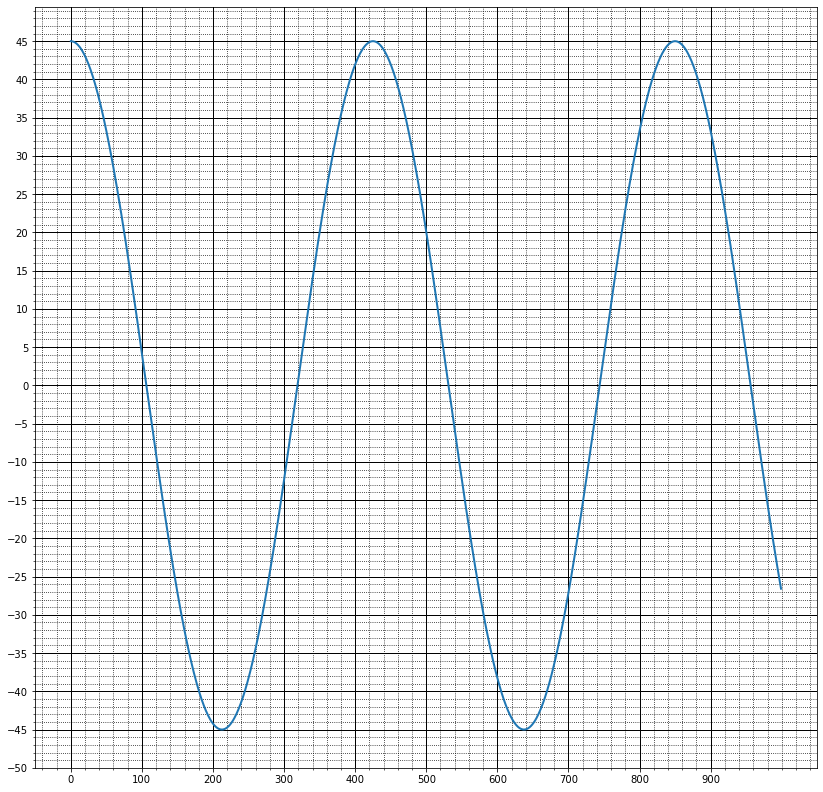

In [11]:
draw_signal(test_data['task2']['a'])

In [12]:
A = 45
T = 425
w = (2 * np.pi)/T
phi = 0

In [13]:
w

0.01478396542865785

In [14]:
# YOUR CODE HERE
x = np.arange(1000)
a = A * np.cos(w * x + phi)

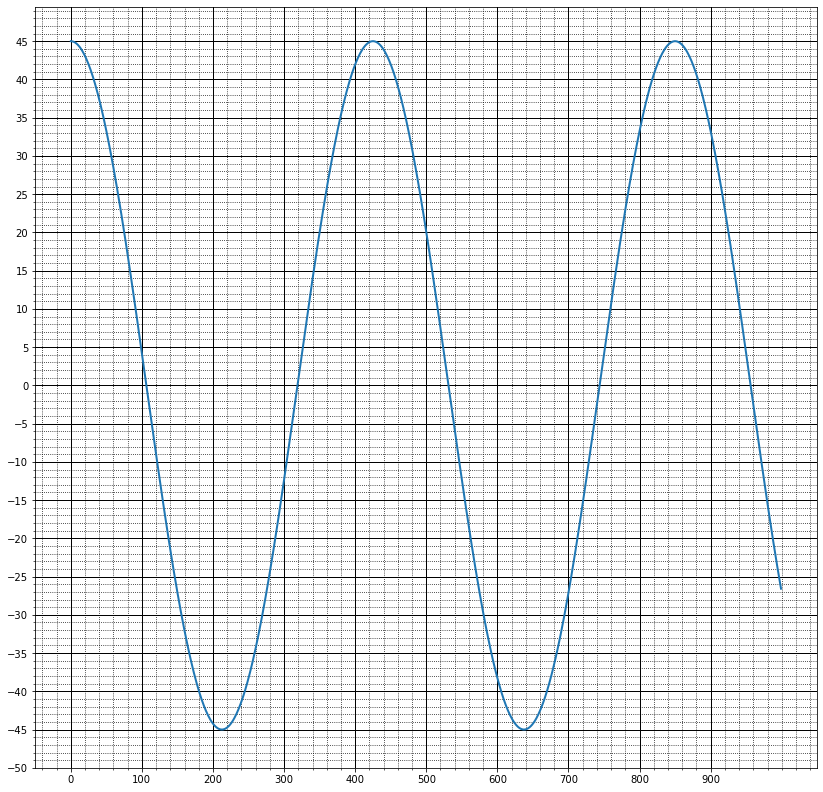

In [15]:
draw_signal(a)

In [16]:
assert len(a) == 1000
assert np.allclose(a, test_data["task2"]["a"], atol=1)
print("Ok!")

Ok!


**Подобранные коэффициенты для сигнала 'a':**

1. Амплитуда - $A= 45$

2. Угловая частота ($ \displaystyle\omega =\frac{2\pi}{T}) = 0.015$

3. Фаза - $\phi= 0$

### Сигнал ***b***

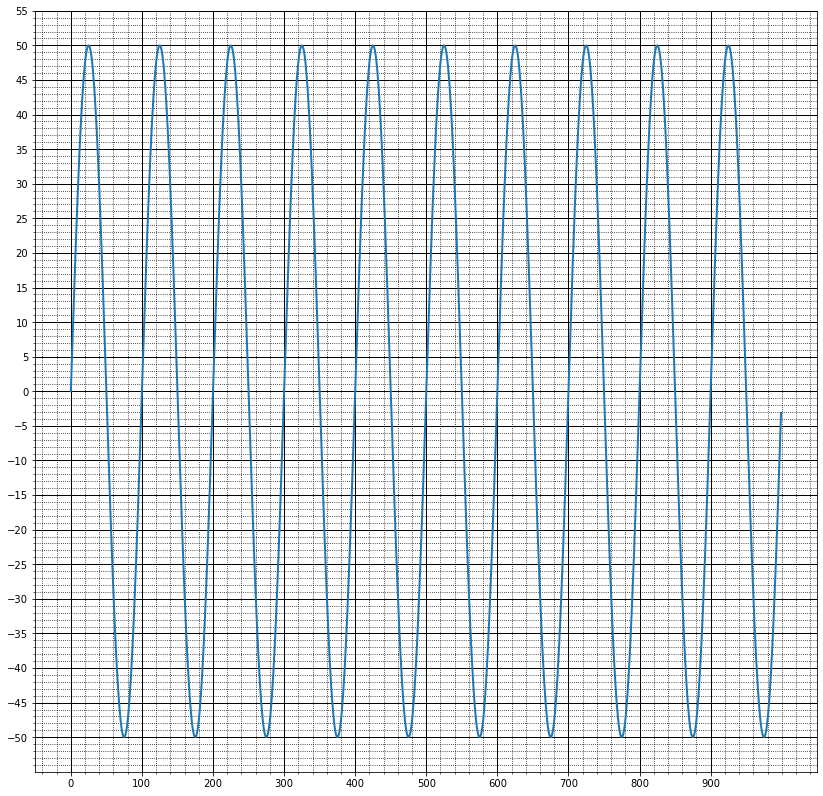

In [17]:
draw_signal(test_data['task2']['b'])

In [18]:
A = 50
T = 100
w = (2 * np.pi)/T
phi = 0

In [19]:
w

0.06283185307179587

In [20]:
# YOUR CODE HERE
x = np.arange(1000)
b = A * np.sin(w * x + phi)

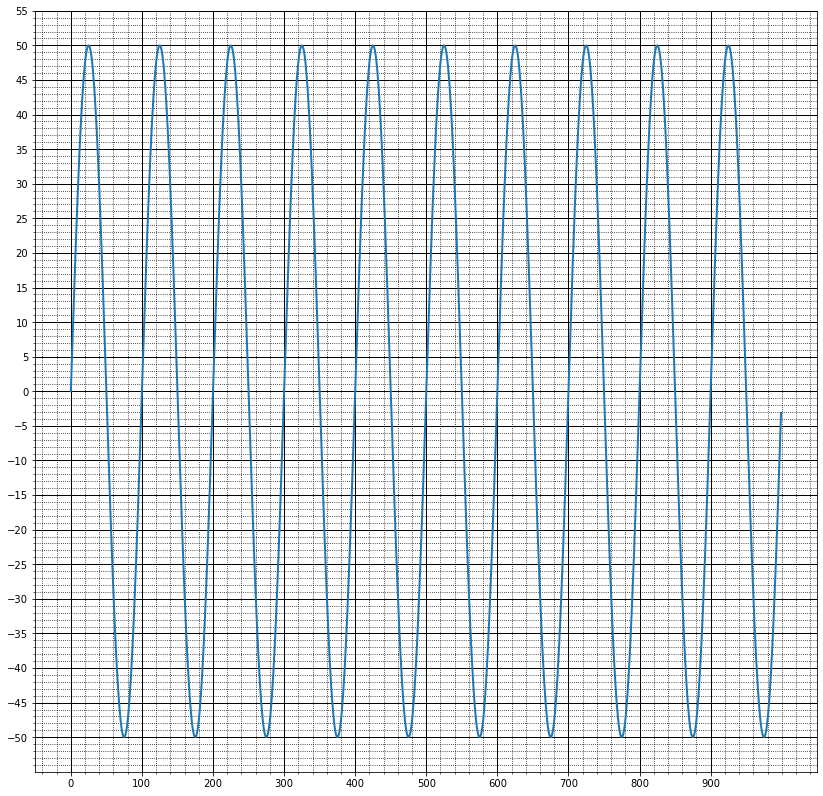

In [21]:
draw_signal(b)

In [22]:
assert len(b)== 1000
assert np.allclose(b, test_data["task2"]["b"], atol=1)
print("Ok!")

Ok!


**Подобранные коэффициенты для сигнала 'b':**

1. Амплитуда - $A= 50$

2. Угловая частота ($ \displaystyle\omega =\frac{2\pi}{T}) = 0.063$

3. Фаза - $\phi= 0$

### Сигнал ***c***

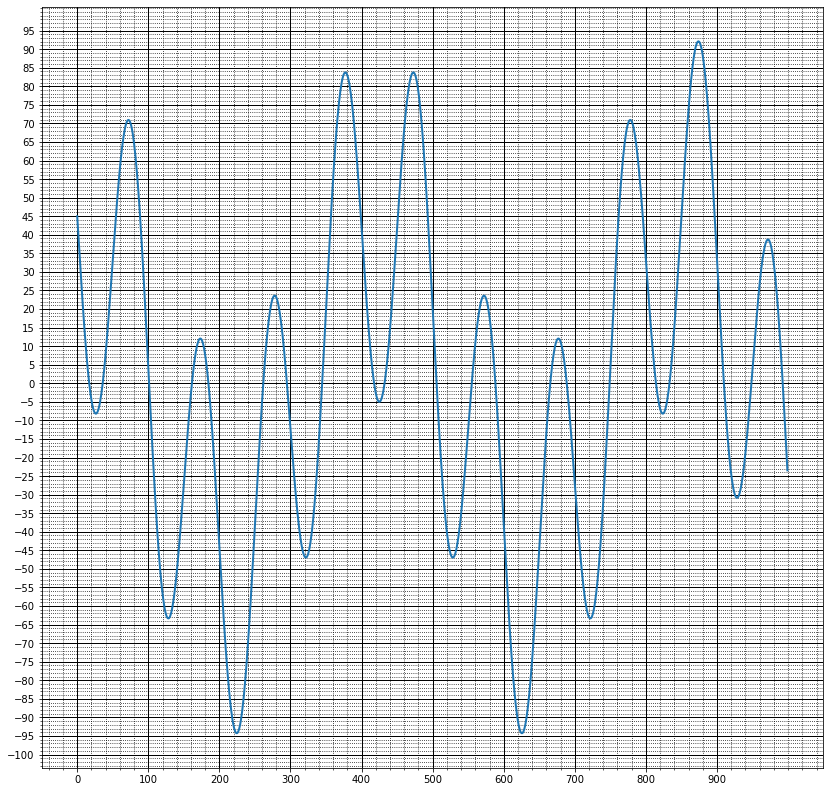

In [23]:
draw_signal(test_data['task2']['c'])

In [24]:
A1 = 45
T1 = 425
w1 = 2 * np.pi / T1
phi1 = 0

A2 = 50
T2 = 100
w2 = 2 * np.pi / T2
phi2 = np.pi / 2
t = np.arange(1000)

In [25]:
# сигнал состоит из двух гармоник
# YOUR CODE HERE
c = A1 * np.cos(w1 * t + phi1) + A2 * np.cos(w2 * t + phi2)

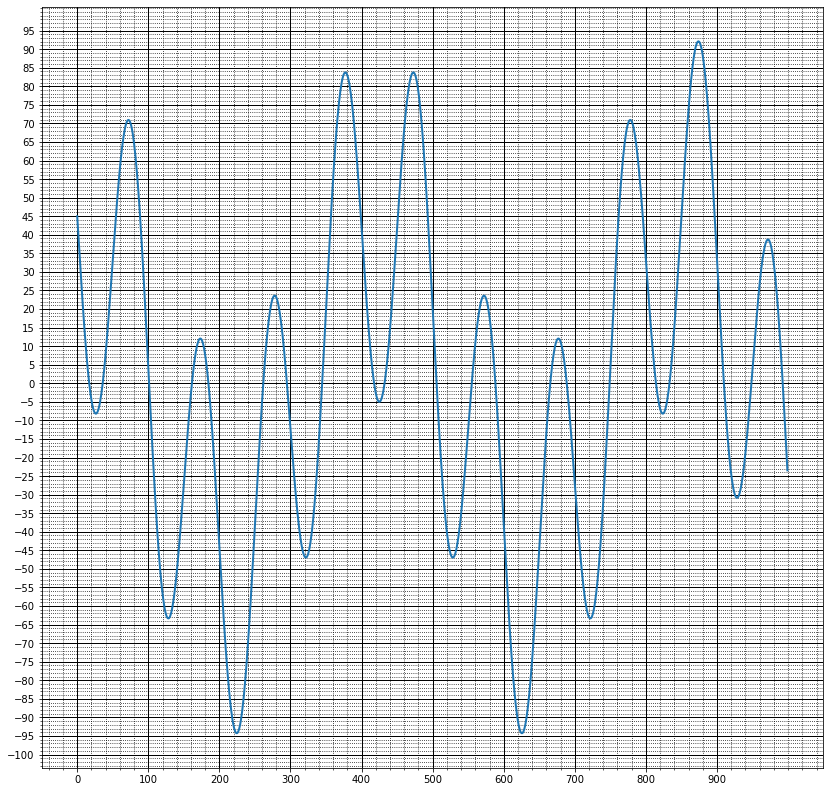

In [26]:
draw_signal(c)

In [27]:
assert len(c)== 1000
assert np.allclose(c, test_data["task2"]["c"], atol=1)
print("Ok!")

Ok!


# Задание 3. Свертка (3 балла)

## Теория
Одна из наиболее частых операций, которая выполняется при обработке сигналов, это свёртка. Свёртка имеет много различных применений, например, с ее помощью можно убрать из сигнала шумы или применить к сигналу эффект эхо.


Свёртка — это математическая операция, применённая к двум функциям f и g и порождающая третью функцию. Операцию свёртки можно интерпретировать как «схожесть» одной функции с отражённой и сдвинутой копией другой.  Другими словами, преобразование свёртки однозначно определяет выходной сигнал y(t) для установленного значения входного сигнала x(t) при известном значении функции импульсного отклика системы h(t).

<!-- ![Convolution](resources/Convolution_of_box_signal_with_itself2.gif "Convolution") -->
![Convolution](resources/Convolution_of_box_signal_with_itself2.gif "Convolution")

Формула свёртки:
$$y_t=\frac{1}{2} \int_0^T x(\tau)h(t-τ)dτ$$
где $\tau$  - длительность импульсной переходной характеристики.

## Практика
Реализуйте операцию свёртки. Сравните её с существующей реализацией scipy.signal.convolve. Постройте графики фильтра, исходного сигнала и результата свертки.

In [28]:
def convolve(in1, in2):
    #YOUR CODE HERE
    len_in1, len_in2 = map(len, [in1, in2])
    result = np.zeros(len_in1 + len_in2 - 1)
    kernel = np.concatenate((np.zeros(len_in2 - 1), np.concatenate((in1, np.zeros(len_in2 - 1)), axis=0)), axis=0)
    for i in range(len(result)):
        l_b = i
        r_b = len_in2 + i
        result[i] = sum(kernel[l_b: r_b] * in2)
    return result

In [29]:
def test_convolve(a, b, print_debug=False):
    my_result = convolve(a, b)
    scipy_result = scipy.signal.convolve(a, b, method='direct')
    if print_debug:
        print(f"Your result {my_result}")
        print(f"Scipy result {scipy_result}")
    assert np.allclose(my_result, scipy_result), f"Test {a} conv {b} failed"
    print("Ok!")

In [30]:
a = np.repeat([0,1,0], 10)
b = np.array([0,1,2,3,2,1,0])
с = convolve(a, b)

In [31]:
test_convolve(a, b, print_debug=False)

Ok!


### Нарисуйте результат свертки a и b

Сигнал **а**

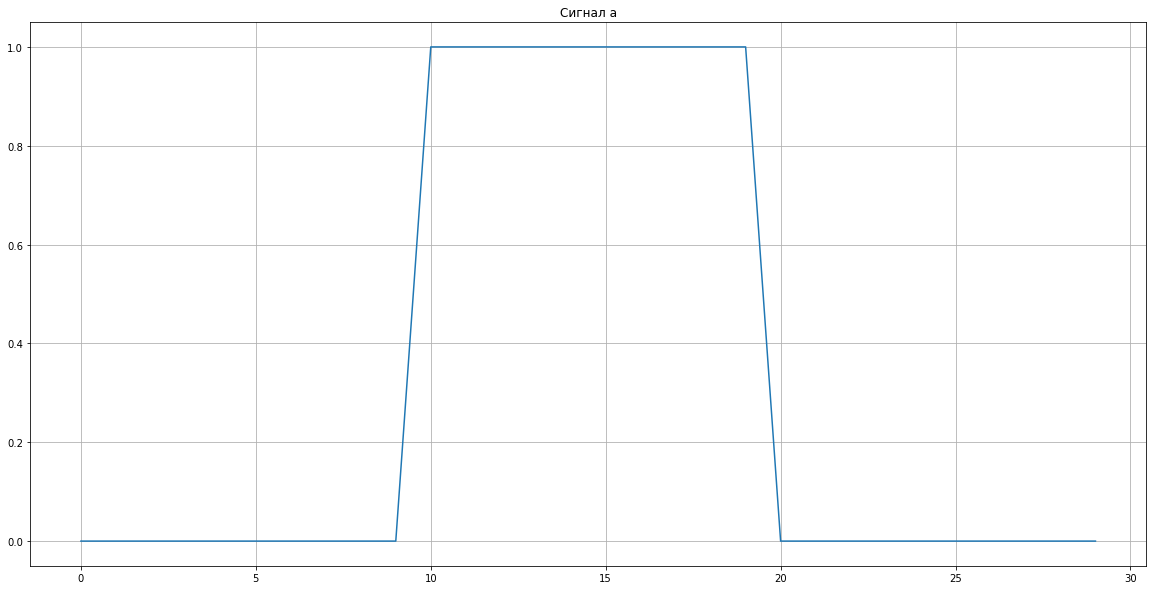

In [32]:
# YOUR CODE HERE
plt.figure(figsize=FIG_SIZE)
plt.grid(True)
plt.title("Сигнал а")
plt.plot(a)
plt.show()

Сигнал **b**

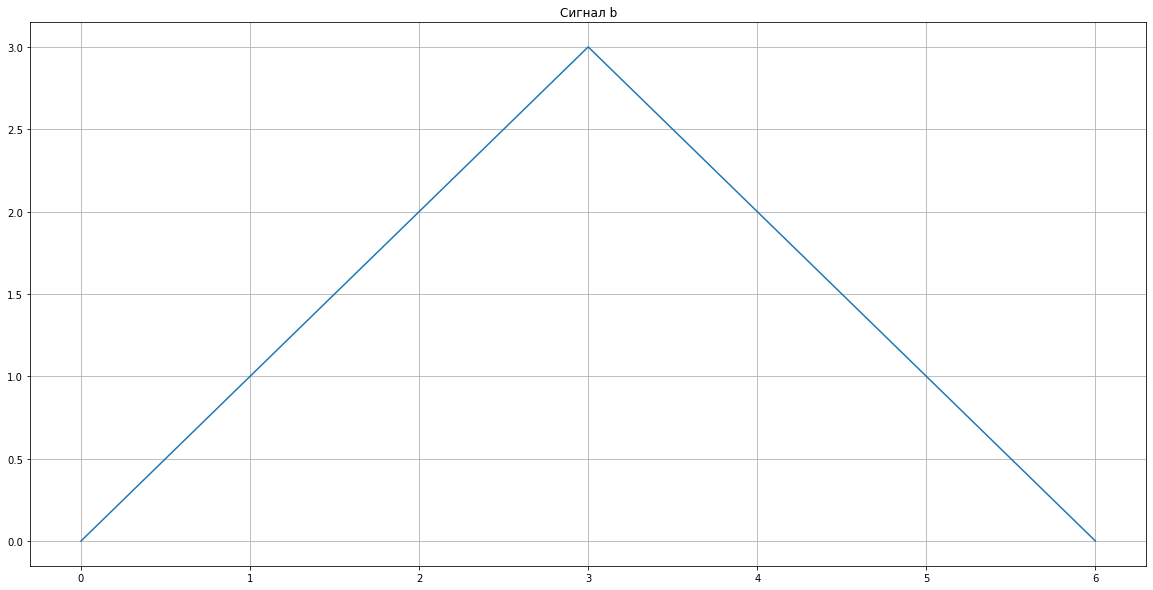

In [33]:
# YOUR CODE HERE
plt.figure(figsize=FIG_SIZE)
plt.grid(True)
plt.title("Сигнал b")
plt.plot(b)
plt.show()

Свертка **a** и **b**

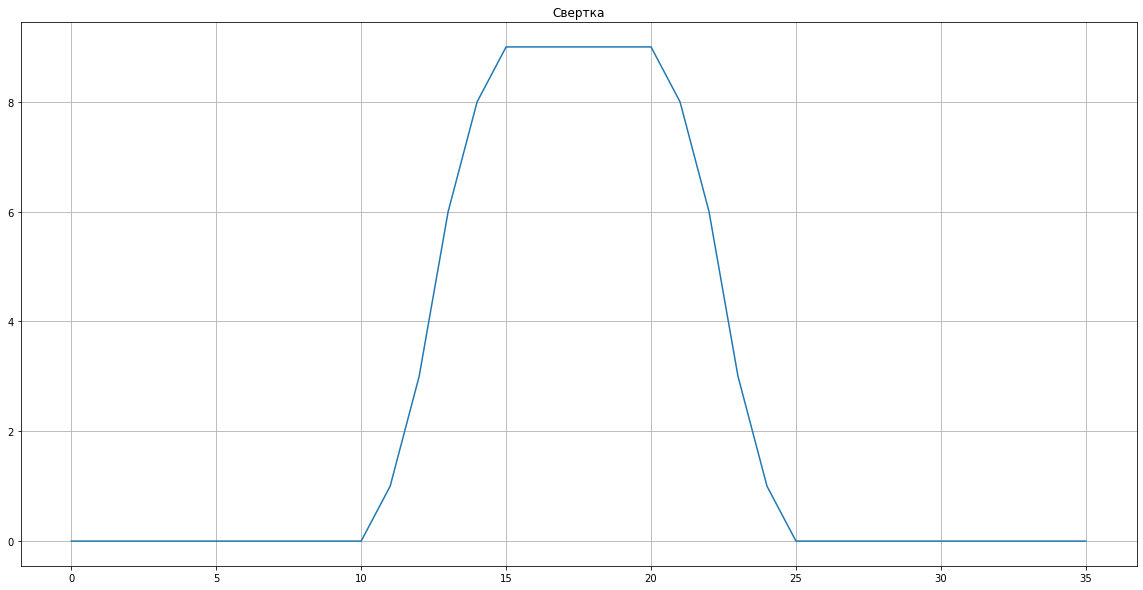

In [34]:
# YOUR CODE HERE
plt.figure(figsize=FIG_SIZE)
plt.grid(True)
plt.title("Свертка")
plt.plot(с)
plt.show()

Все 3 графика на одной картинке:

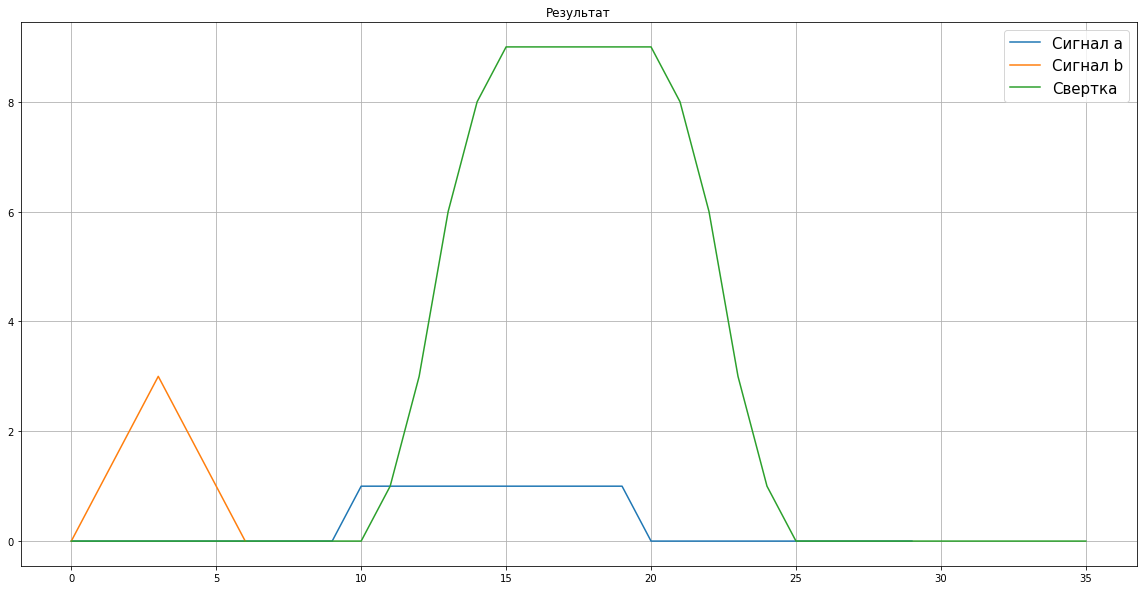

In [35]:
# YOUR CODE HERE
plt.figure(figsize=FIG_SIZE)
plt.grid(True)
plt.title("Результат")
plt.plot(a, label='Сигнал a')
plt.plot(b, label='Сигнал b')
plt.plot(с, label='Свертка')
plt.legend(fontsize=15);
plt.show()

# Задание 4. * Алгоритм Карплуса-Стронга 

Реализуйте  [Алгоритм Карплуса-Стронга](https://en.wikipedia.org/wiki/Karplus%E2%80%93Strong_string_synthesis). В качестве фильтра используйте усреднитель двух смежных отсчетов. Проверьте результат. 

Отрисуйте и воспроизведите полученный сигнал. На что влияют параметры генерации? Попробуйте имитировать звучание разных струн гитары.

In [50]:
def karplus_strong(noise, N):
    # Noise - input
    # N - number of samples to generate
    # return y - generated signal based on Noise 
    # YOUR CODE HERE
    signal = np.zeros(N)
    n = len(noise)
    signal[:n] = noise
    for i in range(n, N):
        signal[i] = (signal[i - n] + signal[i - n - 1])/2
    return signal
    
   

    raise NotImplementedError()

In [51]:
np.random.seed(seed=1)
sample_rate = 44100 
frequency = 82.41
sec = 2
gen_len = sample_rate * sec
noise = (2 * np.random.uniform(-1, 1, int(sample_rate/frequency))) # [-1, 1]

gen_wav = karplus_strong(noise, gen_len)
assert np.allclose(gen_wav[:len(noise)], noise), "Generated signal must starting with noise"
assert np.allclose(gen_wav[len(noise)], (noise[0])/2), "Out of range samples eq 0."
assert np.allclose(gen_wav[len(noise)+1: 2*len(noise)], (noise[:-1] + noise[1:])/2), \
    "Bad requrent rule( 1 iteration)"
assert np.allclose(gen_wav[2*len(noise)], (noise[0]/2 + noise[-1])/2), \
    "Bad requrent rule( 2 iteration)"
assert np.allclose(gen_wav[2*len(noise)+2: 3*len(noise)], \
                   (((noise[:-1] + noise[1:])/2)[:-1] + ((noise[:-1] + noise[1:])/2)[1:])/2), \
    "Bad requrent rule( 3 iteration)"
print('All Ok!')

All Ok!


### Попробуем покрутить параметры генерации

Сгенерируем гитарные ноты:

In [54]:
# YOUR CODE HERE
def generate_notes(sample_rate = 44100, frequency = 82.41, sec = 2):
    np.random.seed(1)
    gen_len = sample_rate * sec
    noise = (2 * np.random.uniform(-1, 1, int(sample_rate/frequency))) # [-1, 1]
    gen_wav = karplus_strong(noise, gen_len)
    return gen_wav
    


Визуализируем затухание амплитуды:

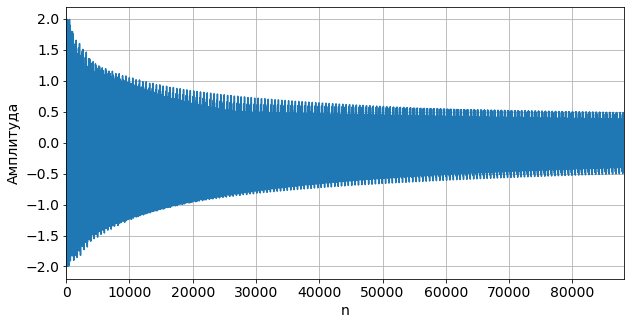

In [45]:
plt.figure(figsize=(10,5))
plt.xlabel('n', fontsize=14)
plt.ylabel('Амплитуда', fontsize=14)
plt.xlim(0, gen_len)
plt.plot(np.linspace(0, gen_len+1, gen_len), gen_wav)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.grid()

Визуализируйте затухание амплитуд гитарных нот:

In [80]:
# YOUR CODE HERE
gen_wav = generate_notes(sample_rate=44100, frequency=50.00)

#draw_signal(gen_wav)

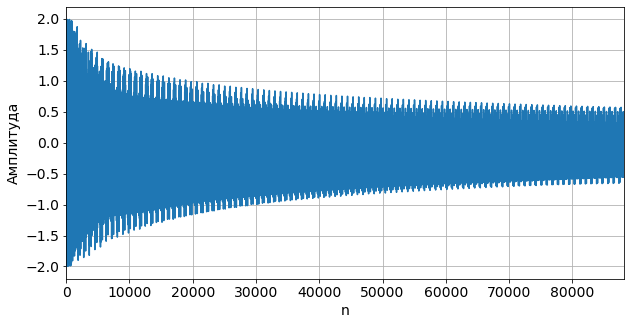

In [81]:
plt.figure(figsize=(10,5))
plt.xlabel('n', fontsize=14)
plt.ylabel('Амплитуда', fontsize=14)
plt.xlim(0, gen_len)
plt.plot(np.linspace(0, gen_len+1, gen_len), gen_wav)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.grid()